In [22]:
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np
from PIL import Image
!pip install opencv-python
import cv2
from skimage import measure
plt.rcParams["image.cmap"] = "gray"

In [133]:
cap = cv2.VideoCapture('./Dataset/DatasetC.avi')
# length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# print(length)

count = 0
frames = []

while(cap.isOpened()):
      
    ret,frame = cap.read()

    if ret== False:
        break
    frames.append(frame)
    count +=1 
frames = np.array(frames)

print(count) #Prints the number of frames in the video

    
cap.release()

140


In [24]:
def ICV_rgb2gray(image):
    '''
    == Input ==
    image  : color image of shape (height, width)
    
    == Output ==  
    gray : Input image converted to grayscale image
    '''

    # r = image[:,:,0]
    # g= image[:,:,1]
    # b= image[:,:,2]
    gray = (0.2989 * image[:,:,0] + 0.5870 * image[:,:,1] + 0.1140 * image[:,:,2])//3
    # gray = np.mean(image, axis=2)

    return gray

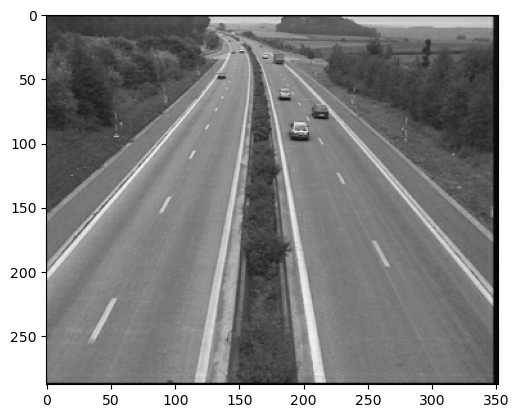

In [25]:
gray_frames = []
for i in range(len(frames)):
    g = ICV_rgb2gray(frames[i])
    gray_frames.append(g)
    plt.imshow(gray_frames[i],cmap = plt.cm.gray)

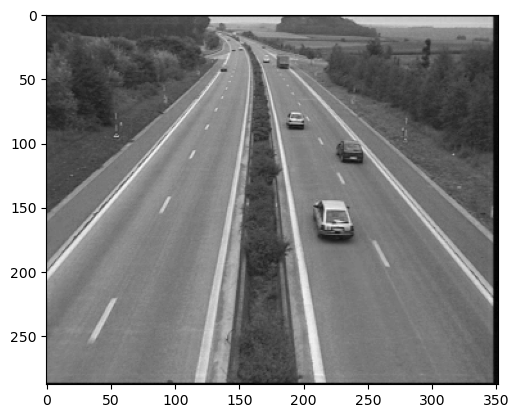

In [66]:
plt.imshow(gray_frames[120])

In [27]:
def ICV_pixeldiff(i1, i2):
    dist_euclidean = np.sqrt(np.sum((i1 - i2)**2)) / i1.size
    return dist_euclidean 

In [28]:
ICV_pixeldiff(gray_frames[0],gray_frames[100])

0.021205289436878976

In [29]:
def ICV_compare_images(img1, img2):
   
    diff = img1 - img2  
    m_norm = (abs(diff))
    return (m_norm)

##### Question 5 part a)

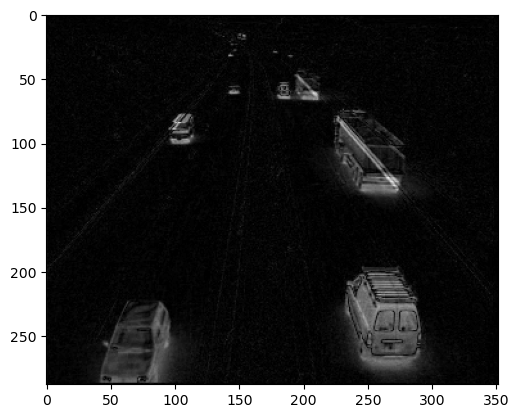

In [67]:
x= (ICV_compare_images(gray_frames[0],gray_frames[50]))
# cx = ICV_convolution(x,kernel)
plt.imshow(x, cmap=plt.cm.gray)

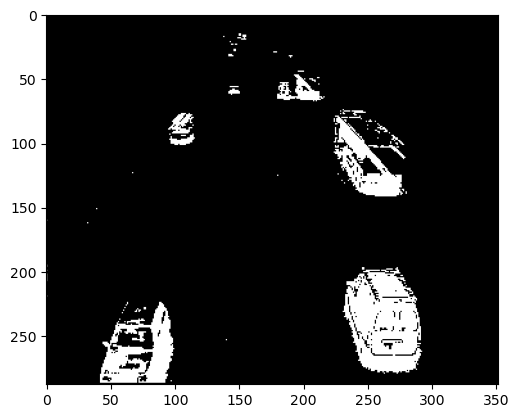

In [76]:
bin_1= ((ICV_compare_images(gray_frames[0],gray_frames[50]))>=12)*1.0
# cx = ICV_convolution(x,kernel)
plt.imshow(bin_1, cmap=plt.cm.gray)

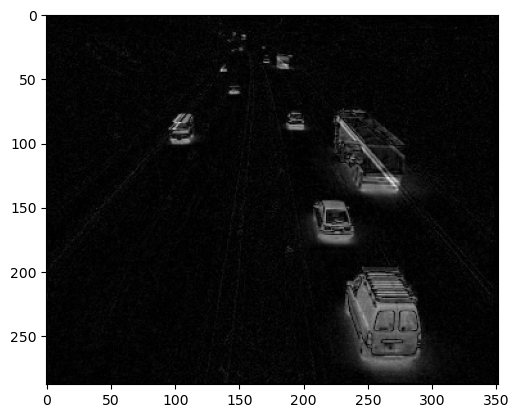

In [68]:
diff_3= (ICV_compare_images(gray_frames[0],gray_frames[120]))
# cx = ICV_convolution(x,kernel)
plt.imshow(diff_3, cmap=plt.cm.gray)

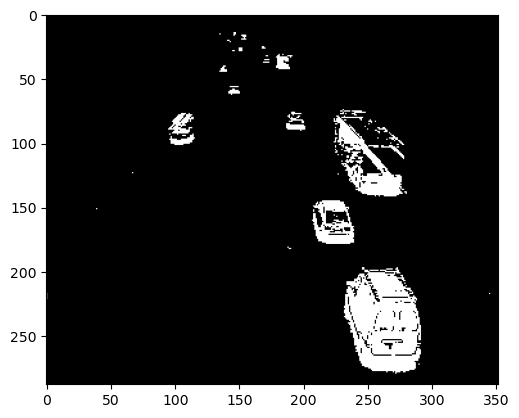

In [77]:
bin_2= ((ICV_compare_images(gray_frames[0],gray_frames[120]))>=12)*1.0
# cx = ICV_convolution(x,kernel)
plt.imshow(bin_2, cmap=plt.cm.gray)

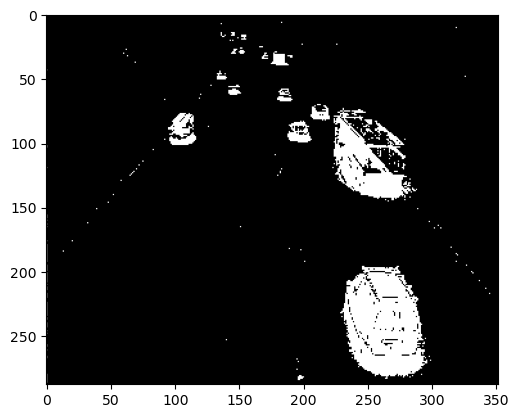

In [31]:
diff_arr= []
for i in range(len(gray_frames)):
    diff = ((ICV_compare_images(gray_frames[0],gray_frames[i])>=8)*1.0)
    diff_arr.append(diff)
    plt.imshow(diff, cmap=plt.cm.gray)

##### Question 5 Part b)

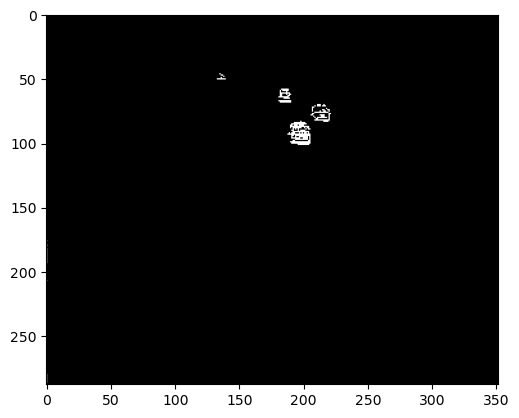

In [102]:
diff_arr1= []
for i in range(len(gray_frames)):
    diff_1 = (ICV_compare_images(gray_frames[i-1],gray_frames[i])>=9)*1.0
    diff_arr1.append(diff_1)
    plt.imshow(diff_1, cmap=plt.cm.gray)

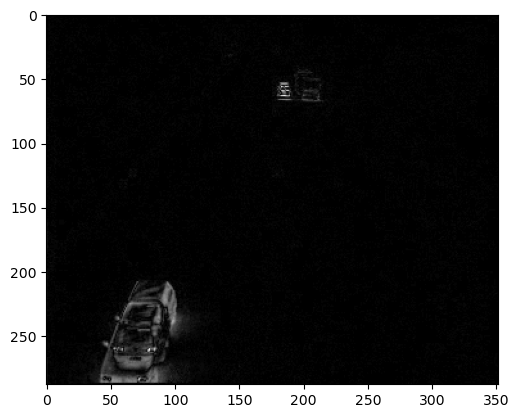

In [85]:
n = (ICV_compare_images(gray_frames[49],gray_frames[50]))
# cx = ICV_convolution(x,kernel)
plt.imshow(n, cmap=plt.cm.gray)

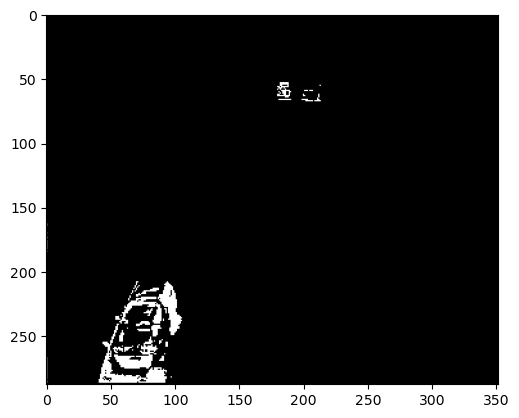

In [103]:
plt.imshow(diff_arr1[50])

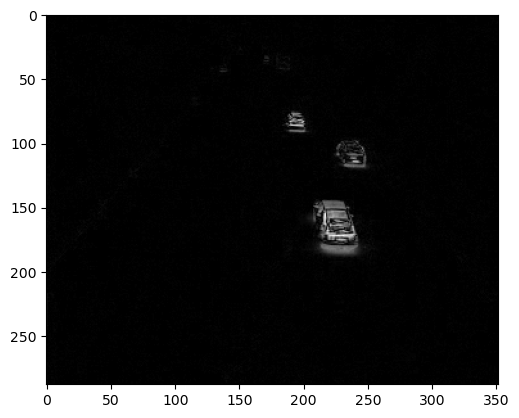

In [79]:
n2= (ICV_compare_images(gray_frames[119],gray_frames[120]))
# cx = ICV_convolution(x,kernel)
plt.imshow(n2, cmap=plt.cm.gray)

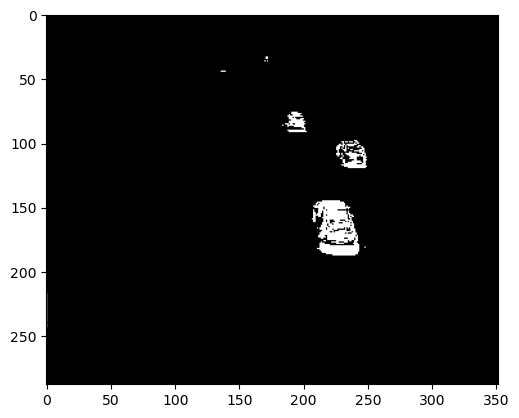

In [104]:
plt.imshow(diff_arr1[120])

##### Question 5 Part c)

In [33]:
def ICV_get_background(video):
    cap = cv2.VideoCapture(video)
    
    frame_indices = cap.get(cv2.CAP_PROP_FRAME_COUNT)* np.random.uniform(size=50) #Getting random 50 frames and computing their median
    frames1 = []
    for i in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        frames1.append(frame)
    
    median_frame = np.median(frames1, axis=0).astype(np.uint8)
    return median_frame

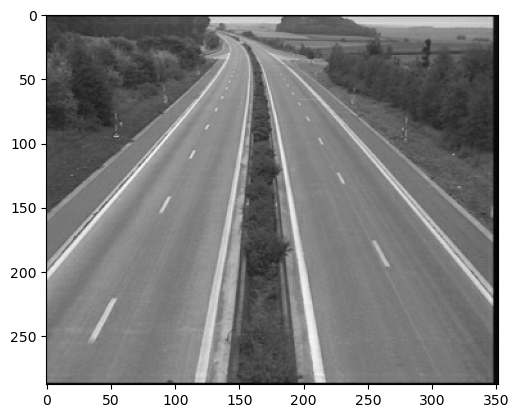

In [34]:
bg = ICV_get_background('DatasetC.avi')
bg = ICV_rgb2gray(bg)
plt.imshow(bg, cmap = plt.cm.gray)

In [105]:
diff_smooth = []
for i in range(len(gray_frames)):
    diff_2 = (ICV_compare_images(bg,gray_frames[i])>=12)*1.0
    # diff_smooth1 = ICV_convolution(diff,kernel)
    diff_smooth.append(diff_2)
    

In [106]:
def ICV_padding_func(img,padding):
    '''
    == Input ==
    img  : image of shape (height, width)
    padding size: size of the padding needed
    
    == Output ==  
    zero : Resultant image after the required padding
    '''
    
    
    zero = np.zeros((img.shape[0]+2*padding, img.shape[1]+2*padding))

    zero[padding:img.shape[0]+padding, padding:img.shape[1]+padding] = img
    return zero

In [107]:
xo = np.ones((5,5))
xpad = ICV_padding_func(xo,2)
xpad

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [108]:
def ICV_knn(image, neighbours):
    imgA = np.zeros_like(image)
    imgpad = ICV_padding_func(imgA, padding = int(neighbours/2))
    for i in range(0, imgpad.shape[0]- neighbours):
        for j in range(0, imgpad.shape[1] - neighbours):
            window = image[i:i+neighbours,j:j+neighbours]
            if (np.sum(window) >= (neighbours*neighbours)-2):
                num =1
            else:
                num=0
            imgA[i,j] = num
            
    return imgA

def ICV_knn2(image, neighbours):
    imgB = np.zeros_like(image)
    imgpad = ICV_padding_func(imgB, padding = int(neighbours/2))
    for i in range(0, imgpad.shape[0]- neighbours):
        for j in range(0, imgpad.shape[1] - neighbours):
            window = image[i:i+neighbours,j:j+neighbours]
            num = np.max(window)
            imgB[i,j] = num
            
    return imgB


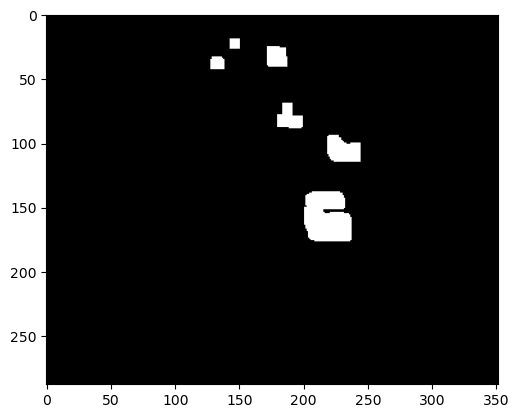

In [119]:
oii = ICV_knn2(ICV_knn(diff_smooth[120], 3),8)
plt.imshow(oii, cmap = plt.cm.gray)

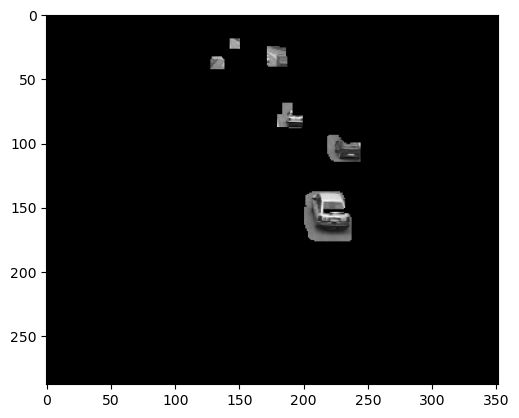

In [122]:
kl=gray_frames[121]*oii
plt.imshow(kl)

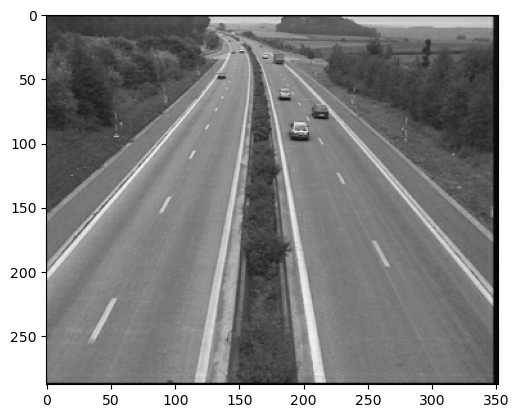

In [60]:
plt.imshow(gray_frames[139], cmap=plt.cm.gray)

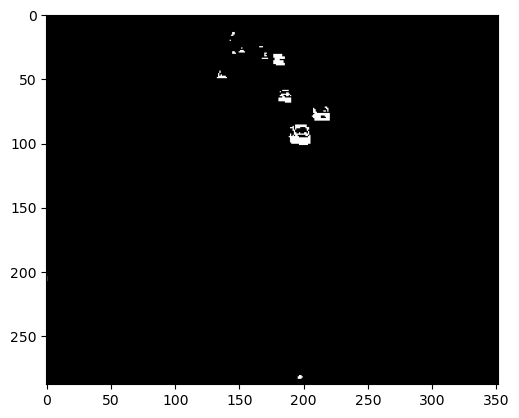

In [61]:
plt.imshow(diff_smooth[138], cmap= plt.cm.gray)

In [123]:
labels = measure.label(oii)
print(labels.max())

6


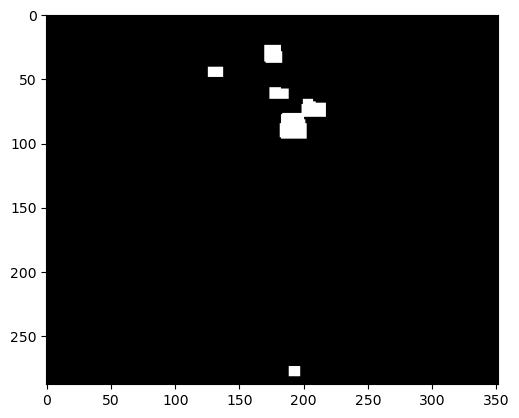

In [131]:
obj_count = []
for i in range(len(diff_smooth)):
    y = ICV_knn2(ICV_knn(diff_smooth[i],3),8)
    labels = measure.label(y)
    obj_count.append(labels.max())
    plt.imshow(y, cmap=plt.cm.gray)

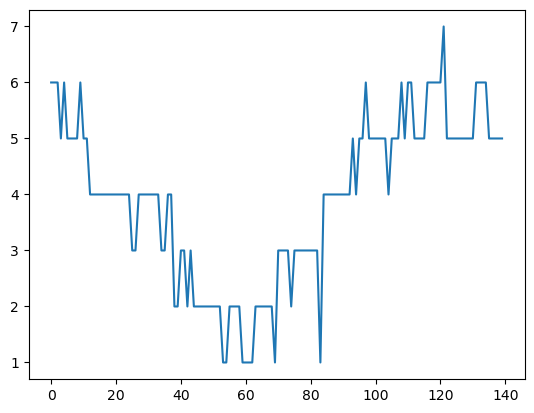

In [132]:
plt.plot(obj_count)

## Experimentation for counting objects

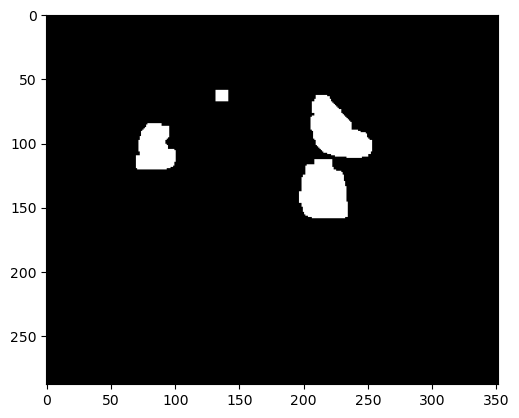

In [37]:
plt.imshow(oii)

In [136]:
number1 = []
for i in range(oii.shape[0]):
    l = []
    for j in range(oii.shape[1]-1):
        l.append(oii[i,j] != oii[i,j+1])
    number1.append(sum(l)//2)
number1 = np.array([number1])

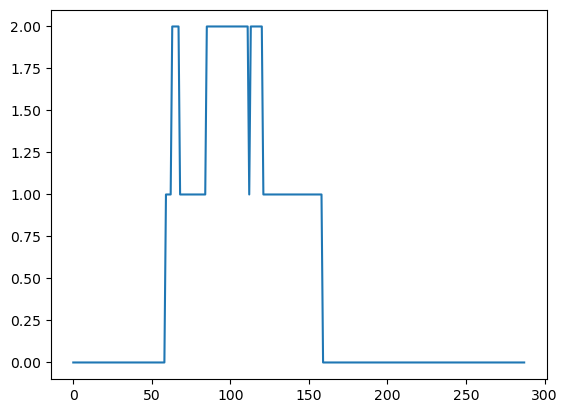

In [137]:
plt.plot(number1[0])

In [138]:
number2 = []
for i in range(oii.shape[1]):
    l = []
    for j in range(oii.shape[0]-1):
        l.append(oii[j,i] != oii[j+1,i])
    number2.append(sum(l)//2)
number2 = np.array([number2])

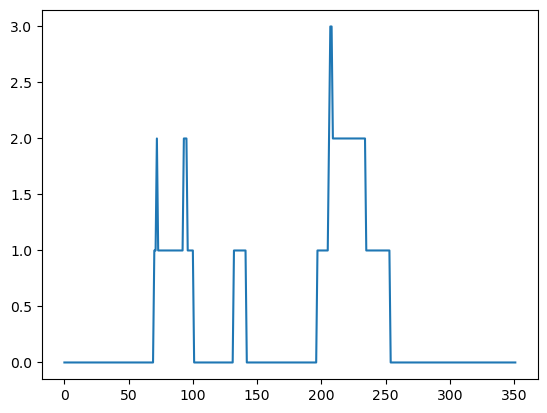

In [139]:
plt.plot(number2[0])

In [140]:
img = (number1.T@number2).flatten()[(number1.T@number2).flatten()>0]

In [141]:
def ICV_count(img):
    counter = {}
    for val in img:
        try:
            counter[val] = counter[val] + 1
        except KeyError:
            counter[val] = 1
    
    return counter

In [142]:
dic = ICV_count(img)

In [143]:
su = np.sum(list(dic.values()))

In [144]:
if list(map(lambda x: x/su, dic.values()))[-1]<0.01:
    print(list(dic.keys())[-2])
else:
    print(list(dic.keys())[-1])

4


In [145]:
dic

{1: 3900, 2: 4460, 3: 120, 4: 1240, 6: 80}

In [151]:
np.sum(np.array(list(dic.values()))*np.array(list(dic.keys())))/np.sum(list(dic.keys()))

1163.75